## INF 510 Fall 2019 Final Project Submission

1.	**The names of team member(s)**:
    
    Reid Pattis

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    This project requires the following packages from the default Anaconda Repository:
    - matplotlib, numpy requests and beautifulsoup
    
    This project requires the following packages from Anaconda Cloud:
    - fake_useragent (from channel mlgill)
    
    To run this code, we need to create a conda environment using the environment.yml file. Then, we use the Python from the *conda* environment to execute pattis_reid_project.py. Below are the specific instructions. Finally, we deactivate the conda environment once we are done. Below are the specific instructions
    
    **browse to the project folder in the command line**
    
    $ cd inf510_project 
    
    **create conda environment**
    
    $ conda env create --prefix ./project-env -f environment.yml 
    
    *feel free to replace project-env with any other name for your environment. Just make sure that you are consistent.*
    
    *note that I recommend using --prefix (instead of -n) to create conda environments since the environments will live in the folder I am working with, instead of in the anaconda envs/ directory*
    
    **activate conda environment**
    
    $ conda activate ./project-env
    
    **run project driver using Python**
    
    $ python src/pattis_reid_project.py -source=remote  # for remote execution
    
    OR
    
    $ python src/pattis_reid_project.py -source=local  # for local execution
    
    **When finished, deactivate conda environment**
    
    $ conda deactivate
    
    **[Optional] To remove the environment after grading, you may input the following (must deactivate environment first)**
    
    $ conda env remove --prefix ./project-env
    

3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**

    (a) First and foremost, I would like to establish that I have permission to access and sample the data on boxrec.com from the owner of the website himself/herself, and, as evidence, I will store the email correspondence as a PDF file within the inf510_project/data/permissions directory. Having said that, the website boxrec.com had back-end scripts that prevented too many requests from the same IP address with same headers. Thankfully, after 48 hours worth of research, I managed to use two techniques that solved the problem – proxy-rotation and fake user headers. 
    
    For proxy-rotation, I extracted free, fast proxies from https://free-proxy-list.net/. Once I extracted a list of proxies that are both valid and efficient in accessing boxrec.com, I will use the proxies *in random order* to request the contents from the web page. By accessing the website using random proxy servers, I was able to bypass the back-end scripts that detect for anomalies.  
	Another concern I had was that the website also checks for user headers of recent requests – too many requests in with the same headers look suspicious. For this, I installed the fake_useragent module from Anaconda Cloud. With this module, I was able to generate random requests headers when requesting for the web page. 
	
    However, when combining the two methods into code, I encountered a severe problem. Some proxies can simply fail to connect for seemingly no reason at all. That was when I realized that the proxy servers are not guaranteed to work for every query. The server may work for some time, but suddenly not work for one single request, yet continue to work fine a minute later. Even though hiccups are tested to happen less than 0.05% of the time, it required me to slightly change my approach. Hence, I developed a new method of querying boxrec.com. 
	
    First, I request for the web page using 2 separate proxies, chosen at random from the list of proxies. If the first request successfully returns the page, then I do NOT request the second time. However, if both queries failed to successfully return the page, then I will use my *own* IP address but with a randomly-generated user header. Lastly, if that does not work, then I will use my own IP address but with my own actual user header, which is guaranteed to work as long as I do not query too often using my own. Based on my test, the chances of me having to use my own IP address is around 3/650, which is below .005% and hence very reasonable. This approach was pretty efficient and guarded against any errors. 

    (b)	When requesting for the web page using the requests module. Initially, I was using requests.get to retrieve the module. However, I realized that it was far more efficient to create a requests.Session object and use session.get instead of requests.get. It turns out that every time I was creating a Response object from requests.get, I was creating a new requests.Session object also, which can be costly. Furthermore, based on my research, if I’m making requests to the same proxies over and over again, the TCP connection will be reused and improves performance significantly. https://2.python-requests.org//en/latest/user/advanced/#session-objects. This step improved my overall execution speed by a factor of 1.5. 
	
    Furthermore, I have decided to create an account on boxrec.com to keep my program accountable to the website. In short, I wanted my program to log into the website using requests.Session and requests.push(URL, data=login_params). This login step isn’t strictly necessary, but I certainly learned how to scrape a website that requires login information. 

    (c) Initially, when parsing the boxrec website using BeautifulSoup, I was using the “html.parser” option. However, after doing some research, it turns out that the “lxml” option is faster in parsing the website. This shaved off a significant amount of time. 

    (d)	Moreover, when researching methods of making BeautifulSoup work faster, I came across bs4.SoupStrainer. This object can be used as an argument in BeautifulSoup’s parse_only attribute. While this did not change the time that it takes to parse the website, it significantly reduced the memory burdens of the requests and searching became more efficient. https://www.crummy.com/software/BeautifulSoup/bs4/doc/#improving-performance.

4.  **Anything else you feel is relevant to the grading of your project your project.**

    Within the data folder, the data for the *test* version will be stored as data_test.pkl and data_test.png, while the data for the *full* version will be stored as data_full.pkl and data_full.png. 
    
    The data stored locally from milestone2 will be stored in the final submission as data/data_full.pkl and data/data_full.png. The milestone2 data *will* be overwritten with the new data if you choose to run the full version of the code once more. 
    
    The permissions folder is the confirmation of permission of usage for the BoxRec website. I did this purely for academic honesty and full transparency
    
    To choose between the full version or test version of the program, in the command-line, run -source=remote as explained in part 1, then you will be prompted to input character "t" or "f". If you input character "t", then the test version of the program will be executed. If you input character "f", then the full version of the program will be executed. If an invalid character is inputed (neither t nor f), then the the program will keep prompting your input until a valid input is shown. 
    
    For the time usage of the test version, it is to be expected that extracting valid proxies will take some time, and retrieving the income level of each country will take some time. Please do not be too alarmed. Overall, the code will take approximately between 3-7 minutes to execute based on extensive testing with my current Internet connection.

5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

	I set out to study whether the there is a correlation between the pro boxer’s average win rates from each country and the overall country’s income level. My hypothesis was that pro boxers from poorer countries tend to fight worse because they could not afford the best coaches, while pro boxers from richer countries tend to fight better because they have the best coaches. 
    
	To study this, I sampled at most 100 pro boxer from each country and calculated their average win rates (if a country has no pro boxers, I simply omit that datapoint entirely). If a country has less than or equal to 100 pro boxers, then I will sample every pro boxer in the country. If not, then I will sample 100 pro boxers at random from the website. Afterwards, using the World Bank API, I look up each country’s income level. There are 4 possible income levels: “High income”, “Upper middle income”, “Lower middle income”, and “Low income.” 
    
    In order to test whether a correlation between the average pro boxing record of a country and the income level of the country, I decided to run a linear regression, and hence I need both variables to be numerical. To do so, I assigned reasonable numbers to each income level (binning). 
    
	High income – 3
	Upper middle income – 2
	Lower middle income – 1
	Low income – 0 
    
    Finally, I managed to perform my analysis.

6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    After obtaining both the average win rates and income levels (expressed as an integer), I ran a linear regression. Astonishingly, I found that the correlation r is a measly +0.119, far below what I had imagined. Even the scatterplot looks so chaotic that any trace of a correlation is uncomprehensible (run the code below to visualize the data). 
    
   **Hence, based on this study, there is no evidence to suggest a correlation between pro boxers’ records in each country and each country’s overall income level.** 
   
   
   

In [1]:
from IPython.display import Image

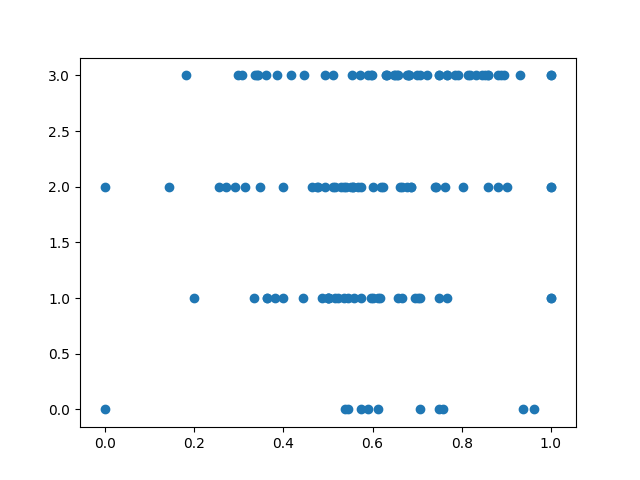

In [2]:
Image("data/data_full.png")

    (part 6 continued) This certainly contradicted my initial hypothesis that countries with higher income level will produce better pro boxing records on average. However, an alternative explanation is that pro boxers from poorer countries tend to work harder on average compared to pro boxers from wealthier countries. 

7. **What difficulties did you have in completing the project?**  


    There were 2 major sources of difficulty. 
    
	The first major source of difficulty was attempting to access the website on a continuous basis. At first, with only the knowledge I learned in class, I was very confused as to why the website is not returning the web page to me after the first 200 to 300 queries. After many hours of research and testing, I had finally realized that the website prevented too many requests from the same IP and user headers. Still, at first, I thought I could get around this by slowing the frequency* of my requests by using the time.sleep function from the time module. However, not only was the code unreasonably slow, the website was still rejecting the queries. That was when I wandered upon several data science articles and Stack Exchange posts on using random proxy servers and disguising my user headers. The implementation took me approximately 1 week and 2 days to complete, and I am proud of my creation.
    
	The second major source of difficulty was improving the efficiency of the execution. The first *full* version of my working program took a whopping 1 hour and 20 minutes to execute. So, I am very proud of my accomplishments in bringing the execution time down to a healthy 40-45 minutes for the full version. 
    
    In the avenue of execution time, I made 3 significant changes. For boxrec.com, which is the difficult website alluded in the previous paragraph, I used requests.Session().get in place of requests.get. Then, I replaced “html.parser” with the “lxml” option for BeautifulSoup. Moreover, I found the SoupStrainer object, which significantly reduced the search time of the BeautifulSoup. 

8. **What skills did you wish you had while you were doing the project?**


    I wish that I had the ability to perform proxy-rotation adeptly. Out of the many hours of research and trial-and-error, it took me a bit more than a week to implement a series of functions that perform proxy-rotation that is both efficient and produces a working program. If I had the ability to perform proxy-rotation before starting the project, that would have saved me at least 60 hours of time in tackling the project and much frustration. Having said that, I am pleased to claim that I have learned a substantial amount of knowledge in proxy-rotation and am able to successfully implement proxy-rotation. 

9. **What would you do “next” to expand or augment the project?**


    To my surprise, even though there is no visible correlation between *average* win rates of Pro Boxers of a country and overall income level of the country, there is one more thing I can do. In hindsight, one Pro Boxer may have a record of 2 wins out of 2 matches, while another Pro Boxer may have a record of 39 wins out of 40 matches. Any serious boxer will claim that the latter boxer has a more impressive record than the first boxer, so taking the average alone would not be able to accurately reflect this fact. (100% vs. 97.5%) Hence, I believe that it would be more interesting to find the correlation between the average *number of wins* of Pro Boxers of a country and overall level of income of the country. This would in my opinion be of greater interest. 
    
	My prediction is that wealthier countries have more wins because boxers receive more funding (and thus more incentive) to train to become professional boxers, while poorer countries have fewer wins because boxers receive less funding (and thus less incentive) to train to become professional boxers.
    
    Since I have already built my proxy-rotation module, the process of sampling pro boxers' average number of wins on boxrec.com will be much more convenient, with the rest of the program identical to this one. 